# Análise Exploratória de Dados - Despesas Militares Globais

Neste notebook, vamos explorar um conjunto de dados sobre despesas militares globais. Vamos analisar as tendências gerais, comparar diferentes países e regiões e lidar com valores ausentes.

## Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import norm, powerlaw

In [2]:
import pandas as pd
# show all cols
pd.set_option('display.max_columns', None)
# show full width of showing cols
pd.set_option('display.width', None)
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000
pd.options.display.max_rows = 400000

## Carregamento dos Dados

In [5]:
# Load the data
df = pd.read_excel("military_expenditure_database(SIPRI).xlsx", sheet_name="Current US$")

/Users/josaum/opt/anaconda3/envs/atech-ai/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Limpeza dos Dados

Aqui, vamos fazer a limpeza dos dados, lidar com valores ausentes e converter os tipos de dados conforme necessário.

In [6]:
# Data cleaning code here# Drop the first four rows and set the fifth row as the column headers
df.columns = df.iloc[4]
df = df.iloc[5:]
# Reset the index
df.reset_index(drop=True, inplace=True)
# Replace 'xxx' and '...' with NaN
df.replace({"xxx": pd.NA, "...": pd.NA}, inplace=True)
# Convert the columns representing years to numeric form
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
# Drop the 'Notes' column
df = df.drop(columns=['Notes'])

# Calculate the number of missing values for each country
missing_values = df.iloc[:, 1:].isnull().sum(axis=1)

# Create a DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Country': df.iloc[:, 0],
    'Missing Values': missing_values
})

# Display the DataFrame, sorted by the number of missing values
missing_values_df.sort_values(by='Missing Values', ascending=False)

,Country,Missing Values
0,NaN,74
124,Central Europe,74
56,Central America and the Caribbean,74
70,North America,74
73,South America,74
85,Asia & Oceania,74
86,Oceania,74
91,South Asia,74
1,Africa,74
98,East Asia,74


In [8]:
df

4,Country,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.436300,99.857000,105.528391,104.515643,99.249351,99.249351,99.249351,98.844251,99.946261,109.942841,136.757098,260.168630,332.252159,480.640374,471.669448,627.852442,711.681247,890.174465,806.569335,932.452708,952.430672,929.290821,953.299654,1127.103217,1196.971384,1028.611425,854.300945,904.269155,565.098063,1053.301643,1276.911083,1334.911648,1234.655192,1452.431008,1752.395278,1910.962052,1826.496570,1881.163649,2091.627274,2100.602521,2206.395762,2802.224794,2924.820167,3093.978245,3945.815125,5172.336907,5280.588156,5671.309117,8652.237040,9326.287144,10161.588239,9724.379972,10412.714003,10217.081700,10073.364021,9583.724288,10303.600575,9708.277440,9112.461105,9145.810174
4,Libya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.571998,5.571998,7.167997,16.687993,18.675993,21.475991,29.119988,58.519977,79.519968,95.479962,143.079943,242.479903,243.035872,202.768227,298.307480,431.682379,287.788253,326.295132,479.647088,729.941801,853.569149,1074.139253,557.334522,709.332451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1251.990817,1443.621758,1153.487088,1085.534665,819.747994,452.513615,541.401767,685.073220,690.930769,614.356296,639.137046,1100.068652,NaN,NaN,NaN,2987.413408,3964.690154,3755.652496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.714286,35.401980,41.692278,41.880517,41.596762,48.275957,53.848540,74.893933,69.993222,63.175700,67.938085,70.348919,90.900288,84.972009,88.924195,111.288010,140.446992,185.783994,241.889161,413.326128,577.239433,731.455472,772.559382,896.353802,1117.955622,975.581463,959.485441,628.153423,512.454401,692.472050,728.545633,815.386106,917.269145,990.555090,1069.720492,1148.445710,1228.526553,1251.786538,1365.250019,1437.898701,1447.128689,1400.949501,1444.959716,1207.516610,859.151483,1470.317615,1474.874326,1819.230070,1937.523822,2031.131381,2134.594876,2408.350250,2944.958473,3055.069442,3160.804832,3342.698956,3402.700836,4065.552317,4048.612524,3268.363376,3327.031890,3461.461531,3696.856945,3721.323837,4830.956394,5378.366535,4995.028074
6,Tunisia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.714286,6.411150,9.523810,14.285714,15.952381,18.571429,14.285714,15.238095,17.478992,12.761905,13.714286,15.428571,17.523810,16.952381,22.476190,24.860542,31.650677,38.188218,46.505448,75.323106,83.960119,121.692505,148.496652,160.900650,194.096120,228.835732,328.600426,383.489474,249.474469,215.938722,206.793455,194.409783,232.920341,234.062030,247.855882,260.431031,289.677115,276.167135,297.068855,342.902458,397.469509,358.166578,365.849375,357.013395,332.389763,335.647907,345.424237,407.385561,444.651417,468.464580,497.212664,490

## Análise Exploratória de Dados

Agora, vamos mergulhar na análise exploratória de dados.

### Tendências Gerais

Vamos analisar como as despesas militares mudaram ao longo dos anos em todo o mundo.

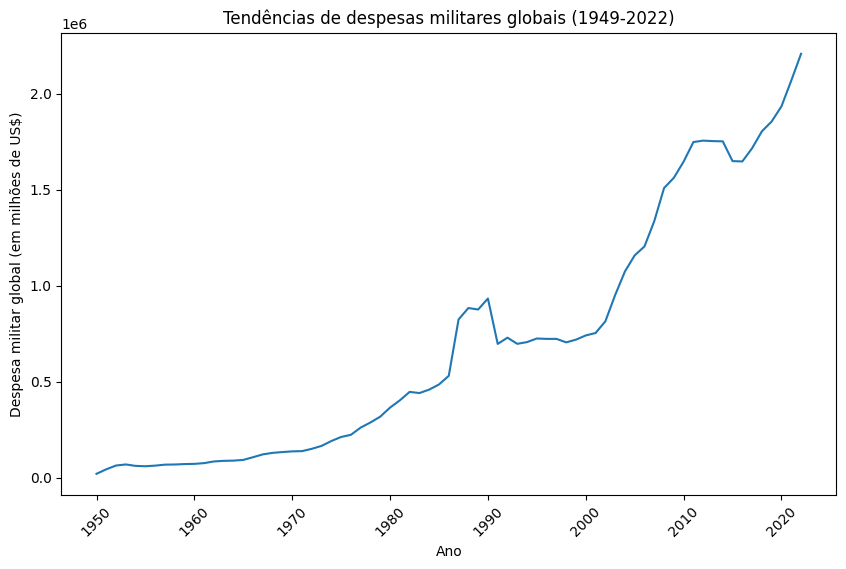

In [9]:
# Calculate the total military expenditure for each year
global_military_expenditure = df.iloc[:, 2:].sum()
# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=global_military_expenditure.index, y=global_military_expenditure.values)
plt.title('Tendências de despesas militares globais (1949-2022)')
plt.xlabel('Ano')
plt.ylabel('Despesa militar global (em milhões de US$)')
plt.xticks(rotation=45)
plt.show()

### Análise por País

Vamos identificar os 5 países com maiores despesas militares no último ano e analisar como suas despesas mudaram ao longo dos anos.

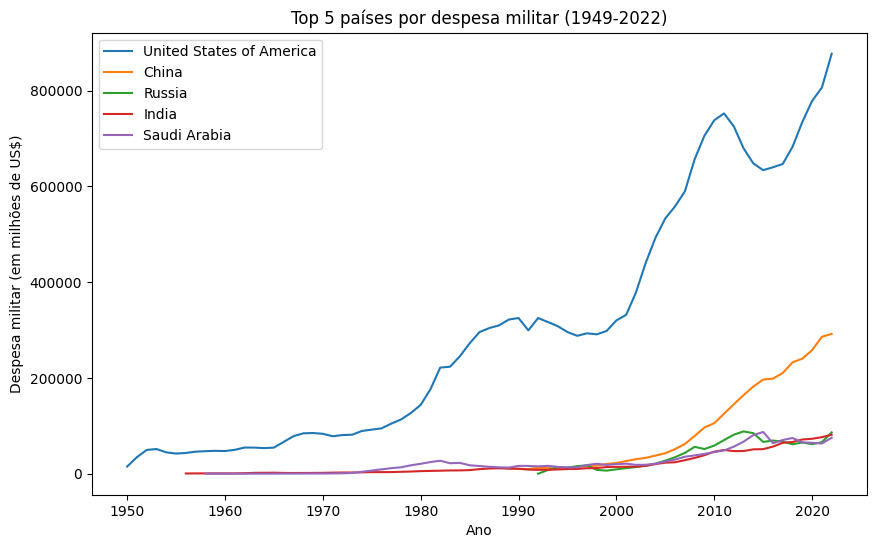

In [10]:
# Assumptions about the data must be made here for regional classification. 
# For this example, we will assume the regions are represented by the rows just before the countries.

# Find the top 5 countries with the highest military expenditure in the most recent year
top_countries = df.sort_values(by=2022, ascending=False).head(5)
# Plot their expenditure over the years
plt.figure(figsize=(10, 6))
for i, row in top_countries.iterrows():
    sns.lineplot(x=row.index[2:], y=row.values[2:], label=row['Country'])
plt.title('Top 5 países por despesa militar (1949-2022)')
plt.xlabel('Ano')
plt.ylabel('Despesa militar (em milhões de US$)')
plt.legend()
plt.show()

In [11]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map and the data
world = world.set_index('name').join(df.set_index('Country'))

# Plot the world chart for a specific year
year = 2022  # replace with the year you're interested in
world[year] = world[year].fillna(0)  # fill missing data with 0
world.plot(column=year, cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Military expenditure in ' + str(year))
plt.show()

AttributeError: module 'geopandas' has no attribute 'read_file'

### Análise de Correlação

Vamos verificar se existe uma relação entre os gastos militares de um país em anos consecutivos.

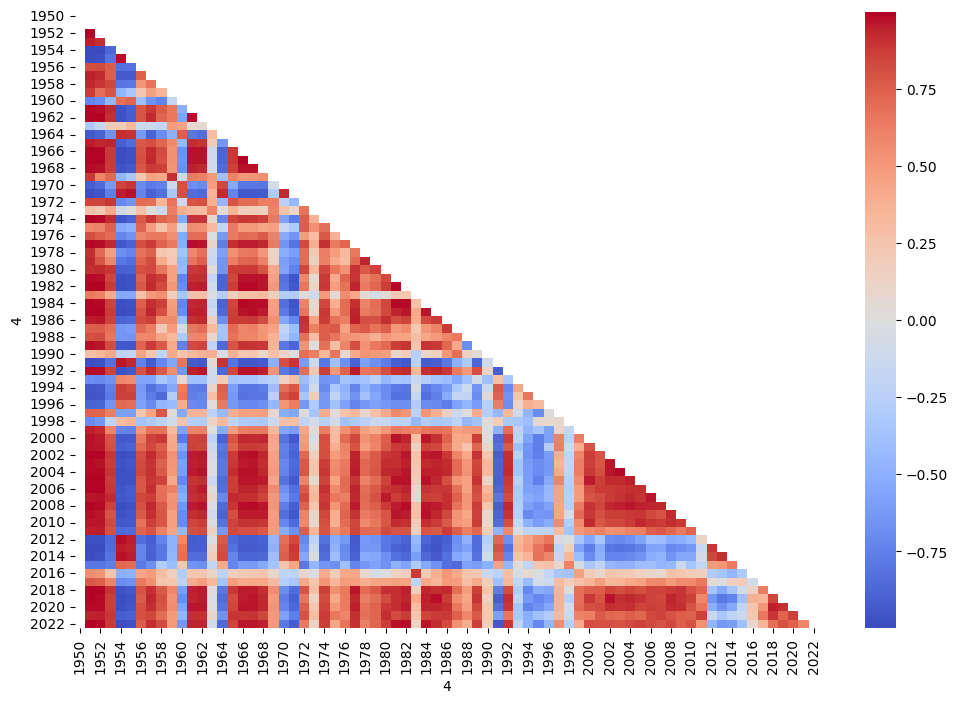

In [12]:
# Calculate the year-on-year differences for each country
df_diff = df.iloc[:, 2:].diff(axis=1)

# Calculate the correlation between the year-on-year differences
correlation = df_diff.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Show the correlation matrix with the mask
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', center=0)
plt.show()

### Plot estatístico

Vamos identificar se há países ou anos com gastos militares incomumente altos ou baixos.

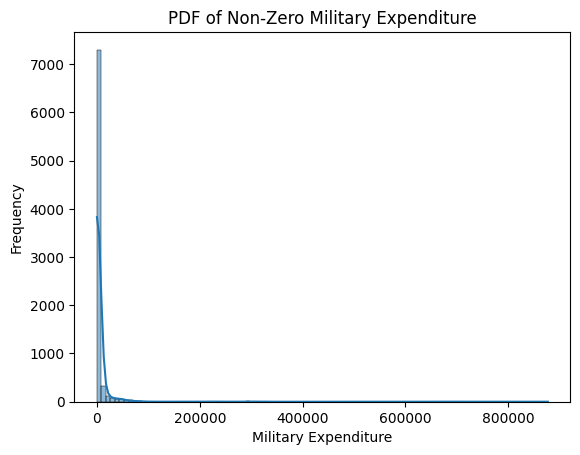

In [13]:
# Flatten the DataFrame to get a Series of military expenditure
military_expenditure = df.iloc[:, 1:].values.flatten()

# Remove zero values
military_expenditure_non_zero = military_expenditure[military_expenditure > 0]

# Plot the histogram and KDE
sns.histplot(military_expenditure_non_zero, bins=100, kde=True)
plt.title('PDF of Non-Zero Military Expenditure')
plt.xlabel('Military Expenditure')
plt.ylabel('Frequency')
plt.show()

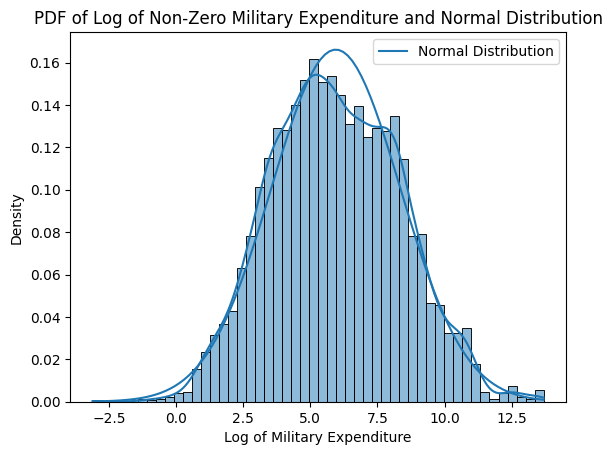

In [14]:
# Take the log of the non-zero military expenditure
log_military_expenditure = np.log(military_expenditure_non_zero)

# Calculate mean and standard deviation of the log-transformed military expenditures
mu, std = np.mean(log_military_expenditure), np.std(log_military_expenditure)

# Generate the x values for the normal distribution
x = np.linspace(log_military_expenditure.min(), log_military_expenditure.max(), 100)

# Generate the y values for the normal distribution
y = norm.pdf(x, mu, std)

# Plot the histogram and KDE of the log-transformed military expenditures
sns.histplot(log_military_expenditure, bins=50, kde=True, stat='density')

# Plot the normal distribution
plt.plot(x, y, label='Normal Distribution')

plt.title('PDF of Log of Non-Zero Military Expenditure and Normal Distribution')
plt.xlabel('Log of Military Expenditure')
plt.ylabel('Density')
plt.legend()
plt.show()

## Conclusões

Finalmente, vamos resumir nossas descobertas e concluir nossa análise.

# Write your conclusions here